In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_boston
from numpy.linalg import inv

In [2]:
#loading the dataset into X matrix and y vector
X,y = load_boston(return_X_y=True)

In [3]:
#dividing into train and test dataset

X_train = np.zeros((400,X.shape[1] + 1))
X_train[:,0] = np.ones(400)
X_train[:,1:] = X[0:400,:]

y_train = y[0:400]
y_train.shape

X_test = X[400:, :]
temp = np.zeros((X_test.shape[0], X_test.shape[1] + 1))
temp[:,0] = np.ones(X_test.shape[0])
temp[:,1:] = X_test
X_test = temp

y_test = y[400:]

## Regularization using Gradient Descent

In [4]:
#scaling the data using z-score normalization

scaler = StandardScaler()

#find mu and sigma
scaler.fit(X_train[:,1:])

X_train[:, 1: ] = scaler.transform(X_train[:, 1:])
X_test[:, 1: ] = scaler.transform(X_test[:,1:])

In [13]:
#defining values

theta = np.random.uniform(0,1,size = X_train.shape[1])
epochs = 500
learning_rate = 0.01
m = X_train.shape[0]
n = X_train.shape[1]
lamba = 10
cost = []
temp_theta = []

In [14]:
#performing regularization using gradient descent

for i in range(epochs):
    y_pred = np.dot(X_train,theta)
    error = y_pred - y_train
    theta = theta - (1/m)*learning_rate*np.dot(X_train.T,error)
    temp_theta.append(theta[1])
    cost.append(np.sum((np.dot(X_train,theta) - y_train)**2)/m + lamba*np.sum(np.dot(theta,theta)))
    
print(theta)

[24.17890083 -0.90820611  0.62514051 -0.13568465  0.61726574 -0.59729636
  4.03692793 -0.03118759 -1.8375801   1.52587727 -0.68026089 -1.57084827
  0.14584677 -3.29491267]


In [15]:
#computing the error
prediction = np.dot(X_test,theta)

print("MAE", metrics.mean_absolute_error(y_true=y_test,y_pred = prediction))
print("MSE", metrics.mean_squared_error(y_true=y_test,y_pred = prediction))

MAE 4.567397891887602
MSE 30.587002401825117


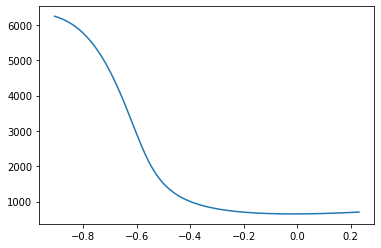

In [16]:
#plotting the curve for new theta vs cost function

plt.plot(temp_theta,cost)

## Regularization using normal equation

In [17]:
#defining the values

lamba = 10
mat = np.identity(X_train.shape[1])
mat[0,0] = 0
print(mat)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [18]:
#defining theta

theta = np.zeros(X_train.shape[1])
print(theta)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
#computing reguralization using normal equation

XTXi = inv(np.dot(X_train.T,X_train) + lamba*mat)
XTy = np.dot(X_train.T,y_train)
theta = np.dot(XTXi,XTy)

In [20]:
prediction = np.dot(X_test,theta)

print("MAE", metrics.mean_absolute_error(y_true=y_test,y_pred = prediction))
print("MSE", metrics.mean_squared_error(y_true=y_test,y_pred = prediction))

MAE 4.883844986488969
MSE 34.304193780565924
